# Let's predict the full loan payment with the Lending Club Dataset

In [240]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [241]:
sns.set_style("darkgrid")

In [242]:
# Read the data
df = pd.read_csv("loan_data.csv")

In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [244]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [245]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


# EDA

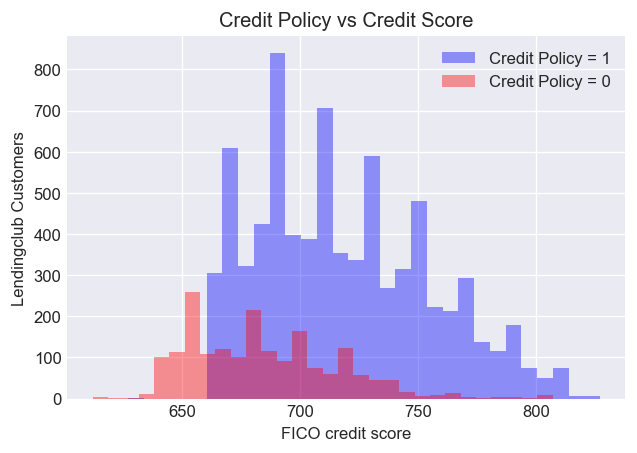

In [246]:
fig = plt.figure(dpi=120)
haveMeet = df[df["credit.policy"] == 1]["fico"]
haventMeet = df[df["credit.policy"] == 0]["fico"]

sns.distplot(haveMeet, kde=False, color="b", bins=30, label="Credit Policy = 1")
sns.distplot(haventMeet, kde=False, color="r", bins=30, label="Credit Policy = 0")

plt.legend()
plt.xlabel("FICO credit score")
plt.ylabel("Lendingclub Customers")
plt.title("Credit Policy vs Credit Score")

** Create a similar figure, except this time select by the not.fully.paid column.**

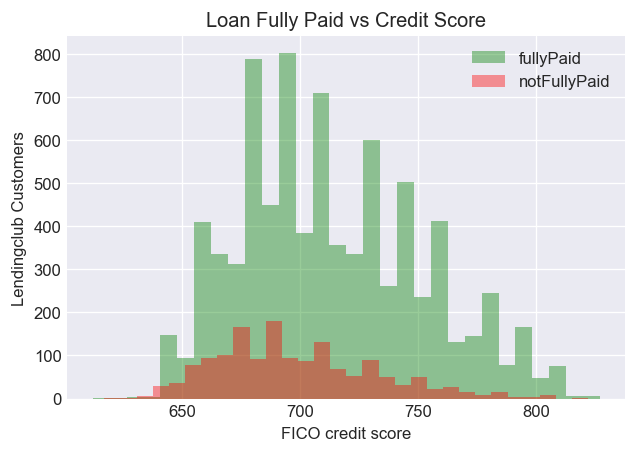

In [247]:
fig = plt.figure(dpi=120)
fullyPaid = df[df["not.fully.paid"] == 0]["fico"]
notFullyPaid = df[df["not.fully.paid"] == 1]["fico"]

sns.distplot(fullyPaid, kde=False, color="g", bins=30, label="fullyPaid")
sns.distplot(notFullyPaid, kde=False, color="r", bins=30, label="notFullyPaid")

plt.legend()
plt.xlabel("FICO credit score")
plt.ylabel("Lendingclub Customers")
plt.title("Loan Fully Paid vs Credit Score")

** Create a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid. **

In [248]:
df.head(1)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.1,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0


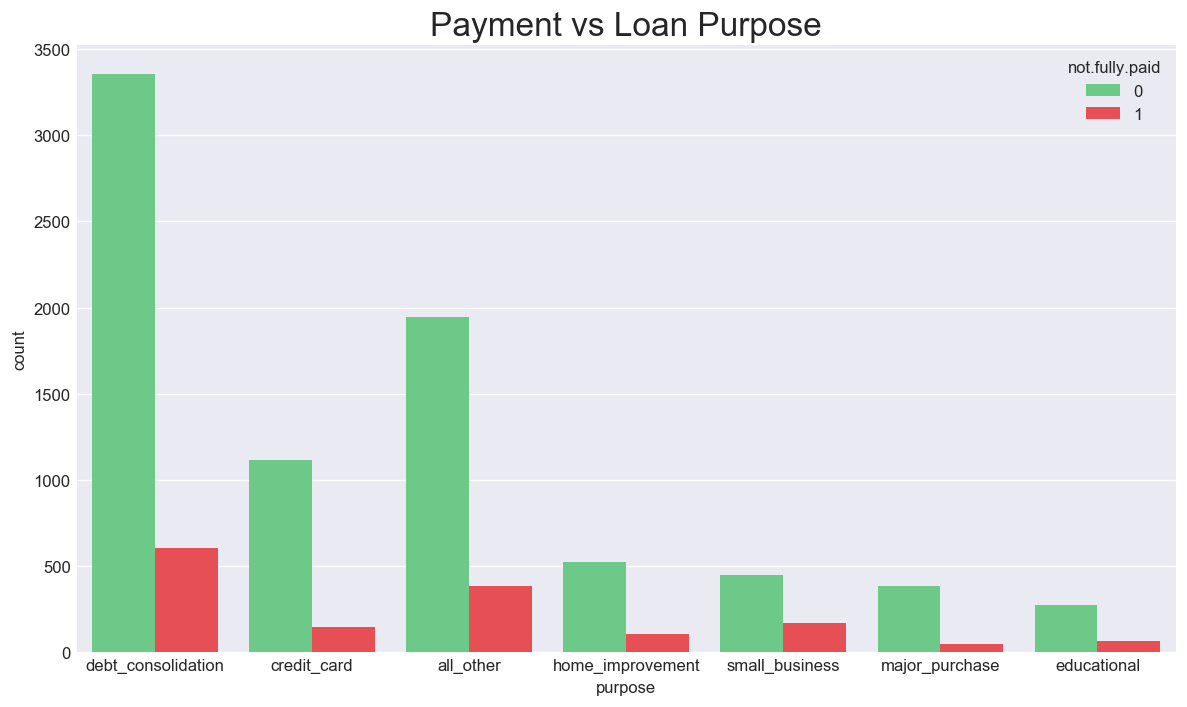

In [249]:
fig = plt.figure(dpi=120, figsize=(10,6))
sns.countplot(df["purpose"], hue=df["not.fully.paid"], palette=["#5cd982","#ff363b"])
plt.title("Payment vs Loan Purpose", fontsize=20)
plt.tight_layout()

In [250]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

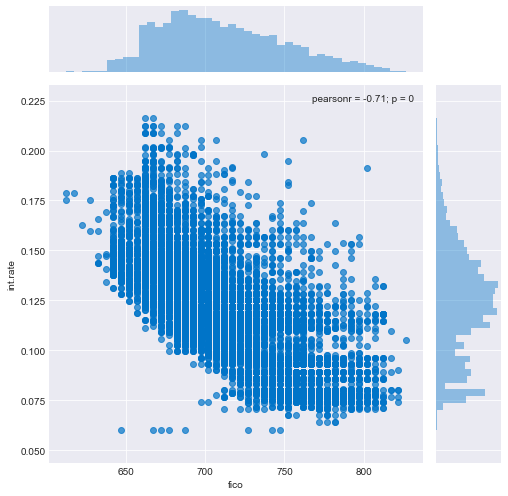

In [251]:
# Lets Check the given interest rate vs the fico score
sns.jointplot("fico", "int.rate", df, size=7, alpha=0.7, color="#0074c8")

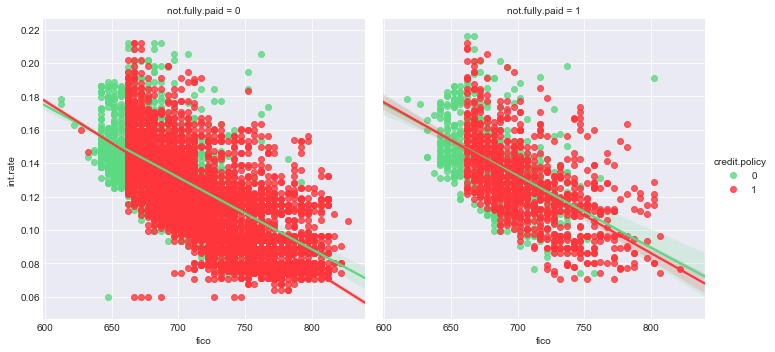

In [252]:
# Let's check the interest rate vs the fico score for the fully paid at left and not fully paid at right
sns.lmplot(x="fico", y="int.rate", data=df, hue="credit.policy", 
           col="not.fully.paid", palette=["#5cd982","#ff363b"])

# Structuring the datas

In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [258]:
# Change the purpose datas to numericals values
cat_feats = ["purpose"]

final_df = pd.get_dummies(df, columns=cat_feats, drop_first=True)

final_df.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [259]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
credit.policy                 9578 non-null int64
int.rate                      9578 non-null float64
installment                   9578 non-null float64
log.annual.inc                9578 non-null float64
dti                           9578 non-null float64
fico                          9578 non-null int64
days.with.cr.line             9578 non-null float64
revol.bal                     9578 non-null int64
revol.util                    9578 non-null float64
inq.last.6mths                9578 non-null int64
delinq.2yrs                   9578 non-null int64
pub.rec                       9578 non-null int64
not.fully.paid                9578 non-null int64
purpose_credit_card           9578 non-null uint8
purpose_debt_consolidation    9578 non-null uint8
purpose_educational           9578 non-null uint8
purpose_home_improvement      9578 non-null uint8
purpose_major_purchase        9

## Let's test 2 differents classification models (Decision Tree and Random Forest)

In [268]:
# First let's split our training and testing dataset
from sklearn.model_selection import train_test_split

X = final_df.drop("not.fully.paid", axis=1)
y = final_df["not.fully.paid"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## DecisionTreeClassifier

In [272]:
from sklearn.tree import DecisionTreeClassifier
# Instantiate the model
dtree = DecisionTreeClassifier()

# fit the model
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [273]:
predictions = dtree.predict(X_test)

In [274]:
# Let's display the result for the Decision Tree Classifier
from sklearn.metrics import classification_report, confusion_matrix

print("\nclassification_report:\n")
print(classification_report(y_test, predictions))
print("\n"*1)
print("confusion_matrix:\n")
print(confusion_matrix(y_test, predictions))


classification_report:

             precision    recall  f1-score   support

          0       0.85      0.81      0.83      2431
          1       0.19      0.24      0.21       443

avg / total       0.75      0.73      0.74      2874



confusion_matrix:

[[1980  451]
 [ 338  105]]


## Random Forest model

In [296]:
from sklearn.ensemble import RandomForestClassifier
# instantiate the model
clf = RandomForestClassifier(n_estimators=300)
# Fit the model
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [297]:
# Let's make some predictions
predictions = clf.predict(X_test)

In [298]:
# Let's display the result for the RandomForestClassifier
print("\nclassification_report:\n")
print(classification_report(y_test, predictions))
print("\n"*1)
print("confusion_matrix:\n")
print(confusion_matrix(y_test, predictions))


classification_report:

             precision    recall  f1-score   support

          0       0.85      1.00      0.92      2431
          1       0.67      0.03      0.05       443

avg / total       0.82      0.85      0.78      2874



confusion_matrix:

[[2425    6]
 [ 431   12]]


## The RandomForestClassifier perform better than the DecisionTreeClassifier